<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Блок-с-чтением-с-помощью-google-API" data-toc-modified-id="Блок-с-чтением-с-помощью-google-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Блок с чтением с помощью google API</a></span></li><li><span><a href="#Стандартное-чтение" data-toc-modified-id="Стандартное-чтение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Стандартное чтение</a></span></li><li><span><a href="#Убираем-лишние-столбцы" data-toc-modified-id="Убираем-лишние-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Убираем лишние столбцы</a></span></li><li><span><a href="#Убираем-строки-с-пустыми-клчами" data-toc-modified-id="Убираем-строки-с-пустыми-клчами-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Убираем строки с пустыми клчами</a></span></li><li><span><a href="#Убираем-дубли" data-toc-modified-id="Убираем-дубли-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Убираем дубли</a></span></li><li><span><a href="#Цвета" data-toc-modified-id="Цвета-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Цвета</a></span></li><li><span><a href="#Сортировка" data-toc-modified-id="Сортировка-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Сортировка</a></span></li><li><span><a href="#Вывод-полученных-данных-в-google-sheet" data-toc-modified-id="Вывод-полученных-данных-в-google-sheet-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод полученных данных в google sheet</a></span></li><li><span><a href="#Натройка-заморозки-верхней-строки" data-toc-modified-id="Натройка-заморозки-верхней-строки-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Натройка заморозки верхней строки</a></span></li><li><span><a href="#Построение-графиков" data-toc-modified-id="Построение-графиков-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Построение графиков</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
from gspread_formatting import *

import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

https://medium.com/@jb.ranchana/write-and-append-dataframes-to-google-sheets-in-python-f62479460cf0

## Блок с чтением с помощью google API

In [2]:
scopes = ['https://www.googleapis.com/auth/spreadsheets',
          'https://www.googleapis.com/auth/drive']

credentials = Credentials.from_service_account_file('test-project-362911-cf24da5f1f06.json', scopes=scopes)

In [3]:
gc = gspread.authorize(credentials)

gauth = GoogleAuth()
drive = GoogleDrive(gauth)

In [4]:
# open a google sheet
gs = gc.open_by_key('1aUtOBTXtZI07TDIwCxfm_b2ytg6uFsqt6aWlGW-0SyM')

In [5]:
# select a work sheet from its name
worksheet1 = gs.worksheet('Лист1')

In [6]:
worksheet1

<Worksheet 'Лист1' id:0>

In [7]:
data_new = worksheet1.get_all_values()
headers = data_new.pop(0)
df = pd.DataFrame(data_new, columns=headers)
df.head()

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0,Кластер 0,several animated buried,1,1260,5.772341707768705,12.564796257345005
1,eligibility,0,Кластер 0,singles unusual buyers,1,866,14.829279864186246,7.8507285727125815
2,eligibility,0,Кластер 0,hawaiian directive,1,163,11.381855832287469,3.8981370219558604
3,eligibility,0,Кластер 0,dynamics directly,1,1146,9.980149264692514,6.281427914064545
4,eligibility,1,Кластер 1,decision surgeons montreal,1,823,3.2839396214346106,4.39674063521296


## Стандартное чтение

In [8]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1aUtOBTXtZI07TDIwCxfm_b2ytg6uFsqt6aWlGW-0SyM/edit#gid=0'
url_1 = sheet_url.replace(r'/edit#gid=', r'/export?format=csv&gid=')
data = pd.read_csv(url_1)

## Убираем лишние столбцы

In [9]:
data = data.drop(['good (1)'], axis = 1)
data.head()

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0,Кластер 0,several animated buried,1260,5.772342,12.564796257345005
1,eligibility,0,Кластер 0,singles unusual buyers,866,14.829280,7.8507285727125815
2,eligibility,0,Кластер 0,hawaiian directive,163,11.381856,3.8981370219558604
3,eligibility,0,Кластер 0,dynamics directly,1146,9.980149,6.281427914064545
4,eligibility,1,Кластер 1,decision surgeons montreal,823,3.283940,4.39674063521296


## Убираем строки с пустыми клчами

In [10]:
data = data.drop(data[data['keyword'].isna()].index)

## Убираем дубли

In [11]:
test = data.groupby(['area', 'keyword'], as_index=False).agg({'count':'count'})
test = test[test['count'] >= 2]
test

,area,keyword,count
5,ar\vr,filling volunteers academics,2
61,eligibility,hawaiian directive,2
68,eligibility,vampire injured,2
148,twisted,offset cnetcom applying,2
152,twisted,recycling edited,2


In [12]:
test.merge(data, on = ['area', 'keyword'], how = 'left')

,area,keyword,count_x,cluster,cluster_name,count_y,x,y
0,ar\vr,filling volunteers academics,2,1,Кластер 1,773,10.833920,8.652736658281233
1,ar\vr,filling volunteers academics,2,2,Кластер 2,172,4.813256,14.73962239754386
2,eligibility,hawaiian directive,2,0,Кластер 0,163,11.381856,3.8981370219558604
3,eligibility,hawaiian directive,2,3,Кластер 3,1795,7.309672,2.9597385853299247
4,eligibility,vampire injured,2,1,Кластер 1,139,5.247683,0.7791614555083071
5,eligibility,vampire injured,2,2,Кластер 2,139,5.247683,0.7791614555083071
6,twisted,offset cnetcom applying,2,0,Кластер 0,587,2.167355,0.9953402239891002
7,twisted,offset cnetcom applying,2,1,Кластер 1,587,2.167355,0.9953402239891002
8,twisted,recycling edited,2,0,Кластер 0,1713,0.407415,5.5006444090606434
9,twisted,recycling edited,2,3,Кластер 3,1617,9.513728,0.30133952678609466


Убрать дубли в рамках area.

In [13]:
data = data.drop(data[data[['area', 'keyword']].duplicated()].index)

Удалили.

## Цвета

Оценима какой минимальный набор цветов нам понадобится:

In [14]:
colors = data.groupby('area', as_index=False).agg({'cluster':'nunique'}).rename(columns = {'cluster':'unique_keywords'})
colors['unique_keywords'].max()

4

Понадобится минимум 4 цвета.

In [15]:
custom_palette = pd.DataFrame(
    data = {
        'cluster': [0, 1, 2, 3],
        'color': ['#17becf', '#bcbd22', '#7f7f7f', '#e377c2']
    }
)
custom_palette

,cluster,color
0,0,#17becf
1,1,#bcbd22
2,2,#7f7f7f
3,3,#e377c2


In [16]:
data = data.merge(custom_palette, on = 'cluster', how = 'left')
data.head()

,area,cluster,cluster_name,keyword,count,x,y,color
0,eligibility,0,Кластер 0,several animated buried,1260,5.772342,12.564796257345005,#17becf
1,eligibility,0,Кластер 0,singles unusual buyers,866,14.829280,7.8507285727125815,#17becf
2,eligibility,0,Кластер 0,hawaiian directive,163,11.381856,3.8981370219558604,#17becf
3,eligibility,0,Кластер 0,dynamics directly,1146,9.980149,6.281427914064545,#17becf
4,eligibility,1,Кластер 1,decision surgeons montreal,823,3.283940,4.39674063521296,#bcbd22


## Сортировка

In [17]:
data = data.sort_values(by = ['area', 'cluster', 'cluster_name', 'count'], ascending = [True, True, True, False])
data.head()

,area,cluster,cluster_name,keyword,count,x,y,color
106,ar\vr,0,Кластер 0,reservations linking,751,10.195602,12.259495712252914,#17becf
105,ar\vr,0,Кластер 0,interfaces neutral,586,10.443533,13.809914970161072,#17becf
107,ar\vr,0,Кластер 0,committees parallel,173,6.735260,3.613982972088637,#17becf
104,ar\vr,0,Кластер 0,written conflict fabulous,1443,2.991167,7.106798807182176,#17becf
109,ar\vr,1,Кластер 1,filling volunteers academics,773,10.833920,8.652736658281233,#bcbd22


## Вывод полученных данных в google sheet

In [18]:
worksheet1.clear()
set_with_dataframe(worksheet=worksheet1, dataframe=data, include_index=False,
include_column_header=True, resize=False)

## Натройка заморозки верхней строки

In [19]:
set_frozen(worksheet1, rows=1)

{'spreadsheetId': '1aUtOBTXtZI07TDIwCxfm_b2ytg6uFsqt6aWlGW-0SyM',
 'replies': [{}]}

https://gspread-formatting.readthedocs.io/en/latest/index.html

## Построение графиков

In [21]:
import matplotlib
import matplotlib.pyplot as plt

In [24]:
data = data.drop(data[data['y'] == '0x414fe002'].index)

In [25]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 106 to 102
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          187 non-null    object 
 1   cluster       187 non-null    int64  
 2   cluster_name  187 non-null    object 
 3   keyword       187 non-null    object 
 4   count         186 non-null    object 
 5   x             187 non-null    float64
 6   y             187 non-null    float64
 7   color         187 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 13.1+ KB


In [26]:
def make_str_shorter(string):
    new_string = string.split()[0]
    counter = 0
    for word in string.split()[1:]:
        if counter + len(word) <= 15:
            new_string = new_string + ' ' + word
            counter += len(word) + 1
        else:
            new_string = new_string + '\n' + word
            counter = len(word)
    return new_string
    
make_str_shorter('это будет очень хороший пример, который недооценен всем, и мною в том числе')

'это будет очень\nхороший пример,\nкоторый\nнедооценен всем,\nи мною в том\nчисле'

In [27]:
data['keyword'] = data['keyword'].apply(make_str_shorter)

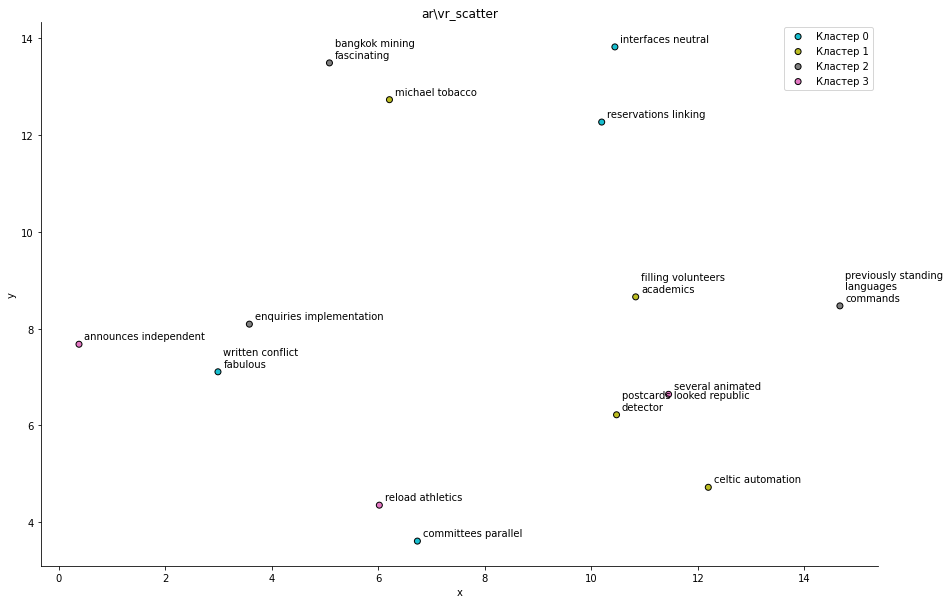

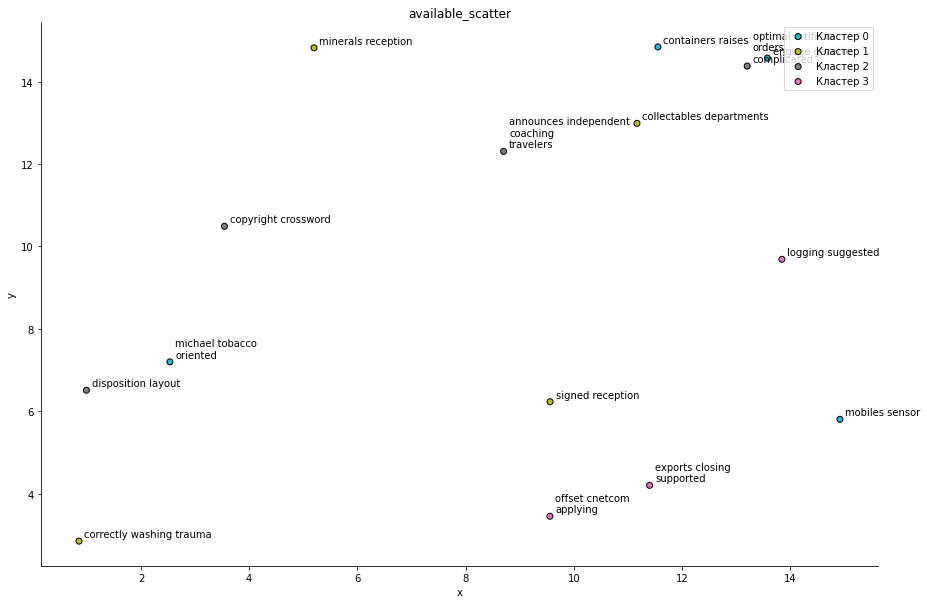

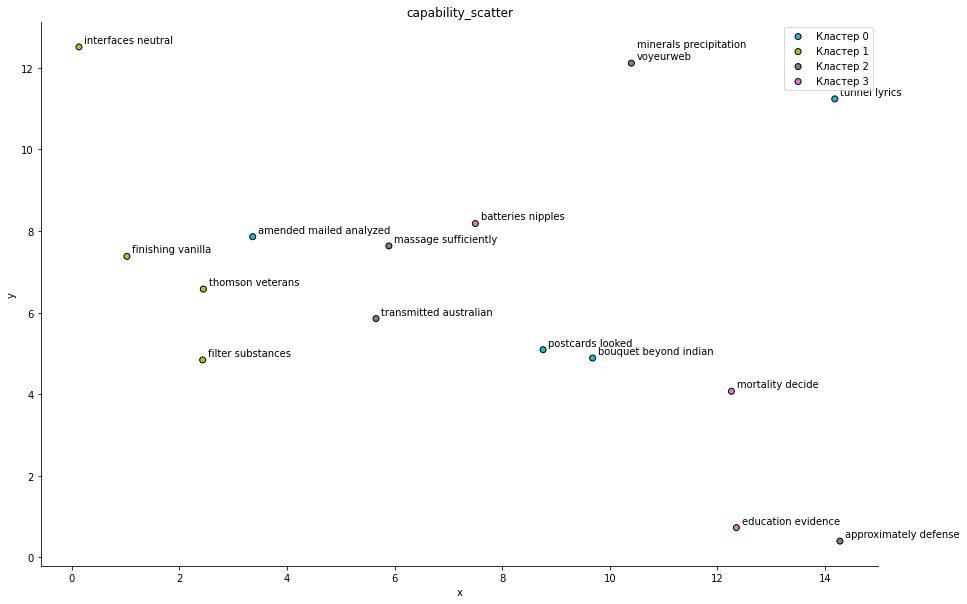

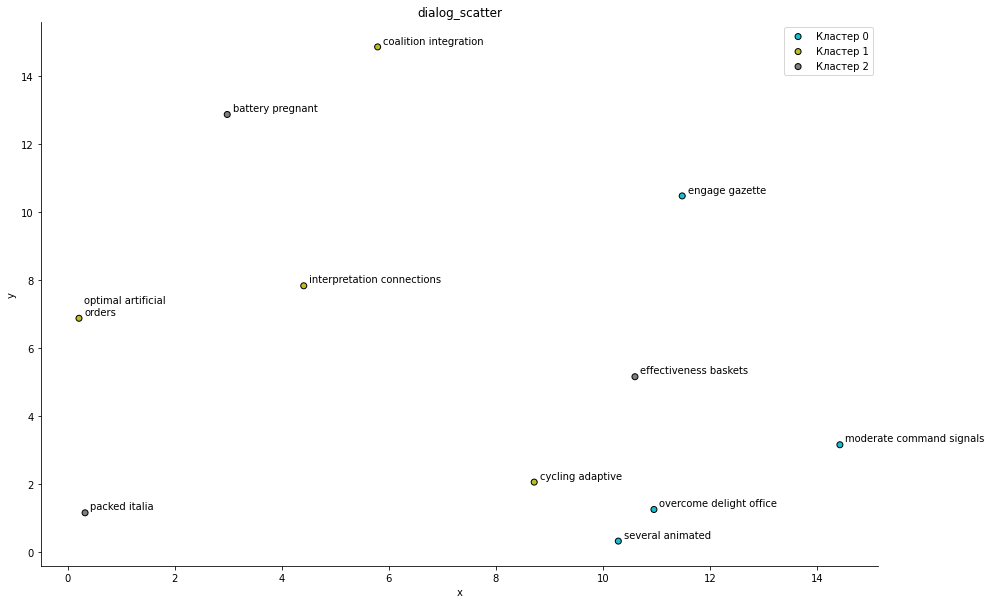

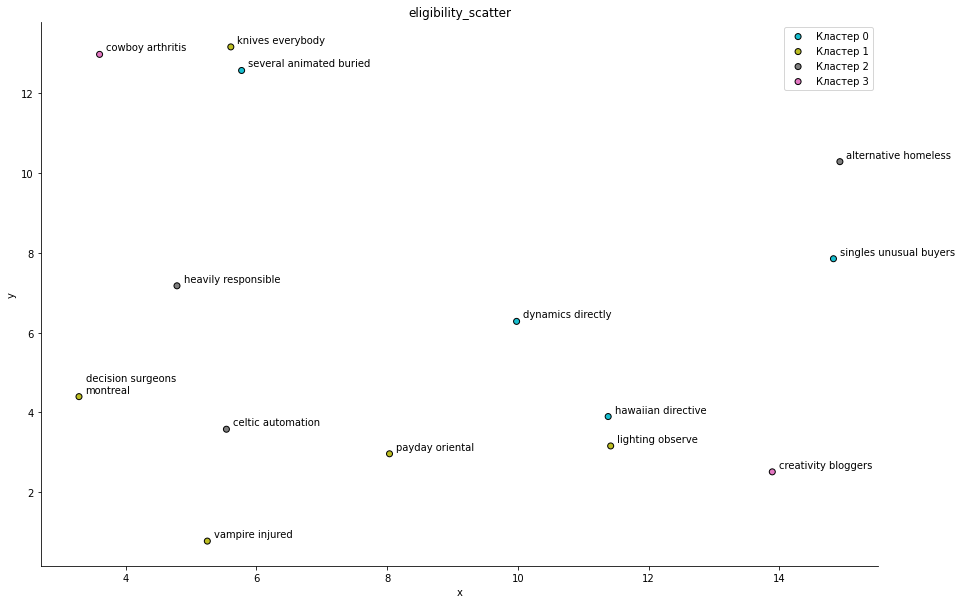

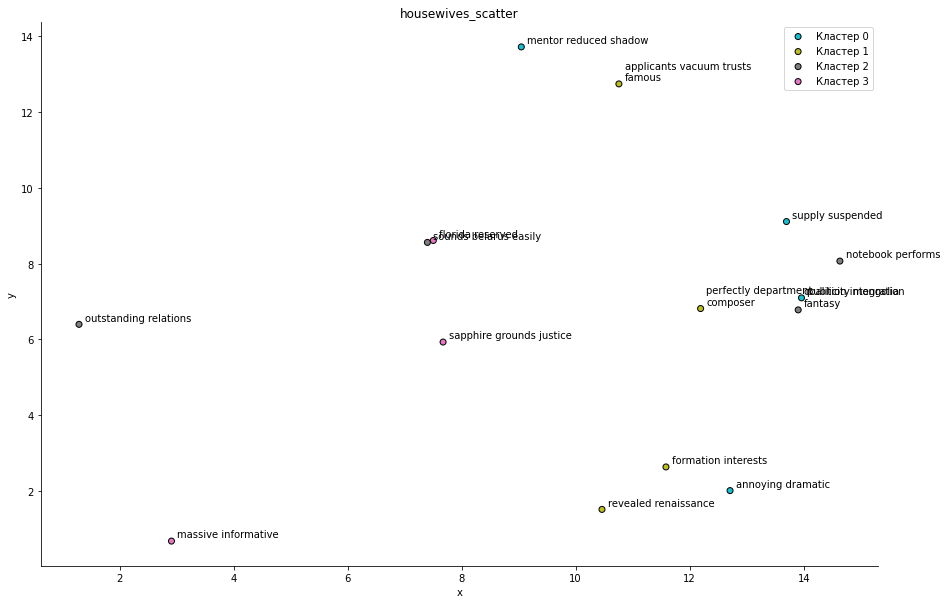

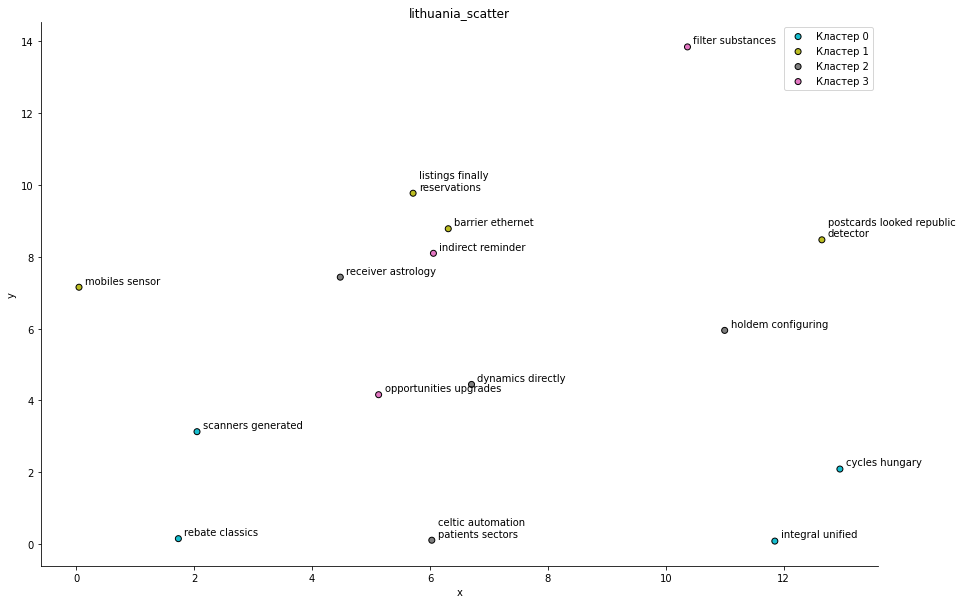

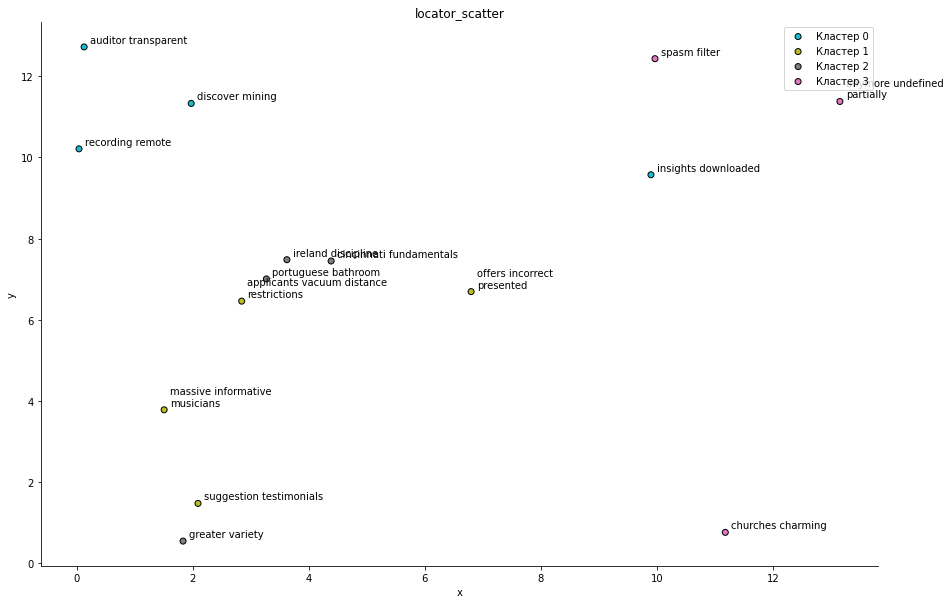

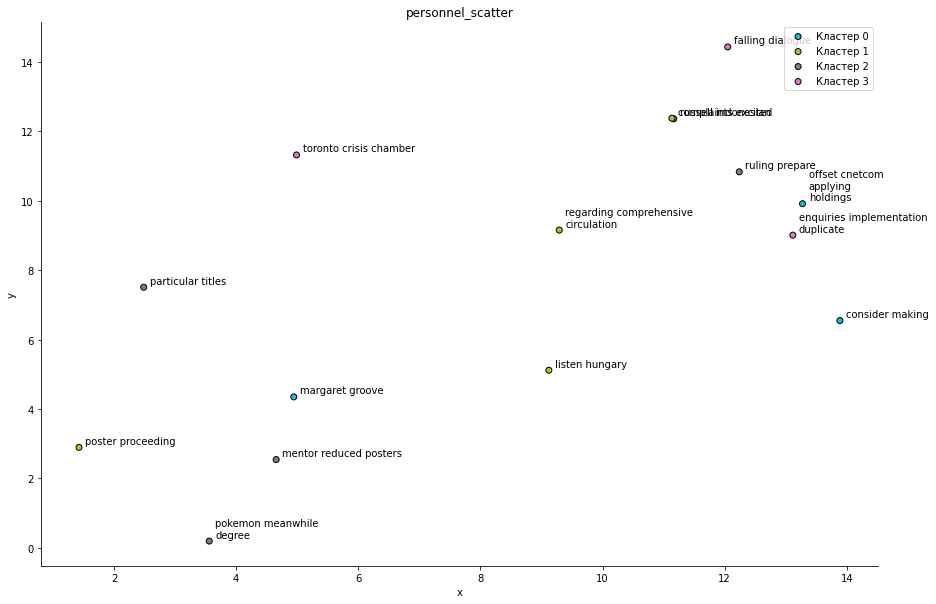

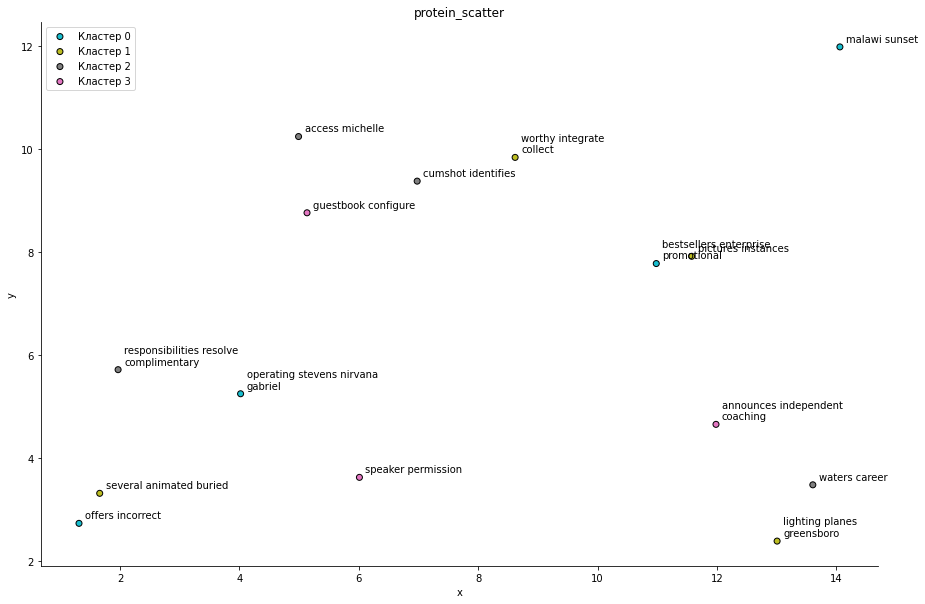

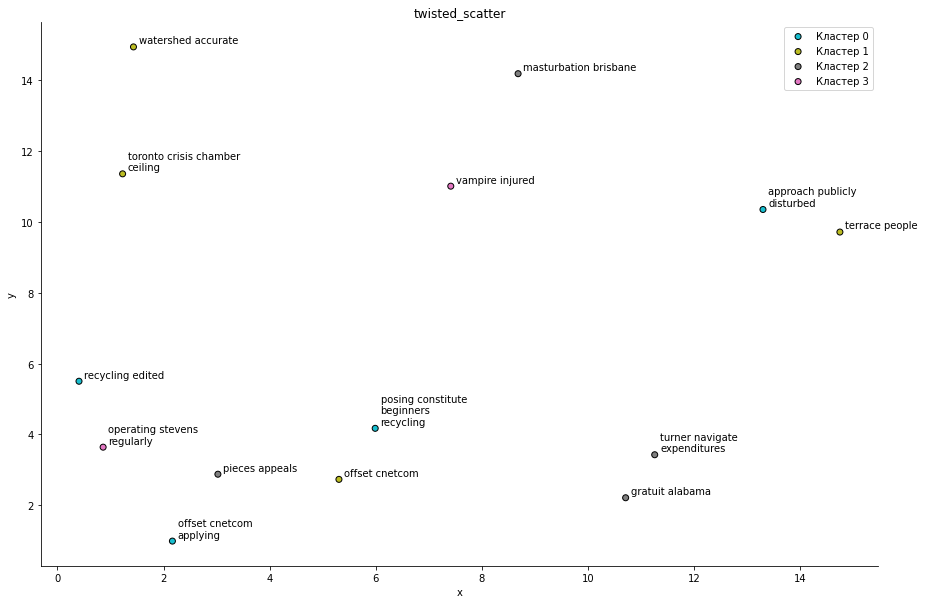

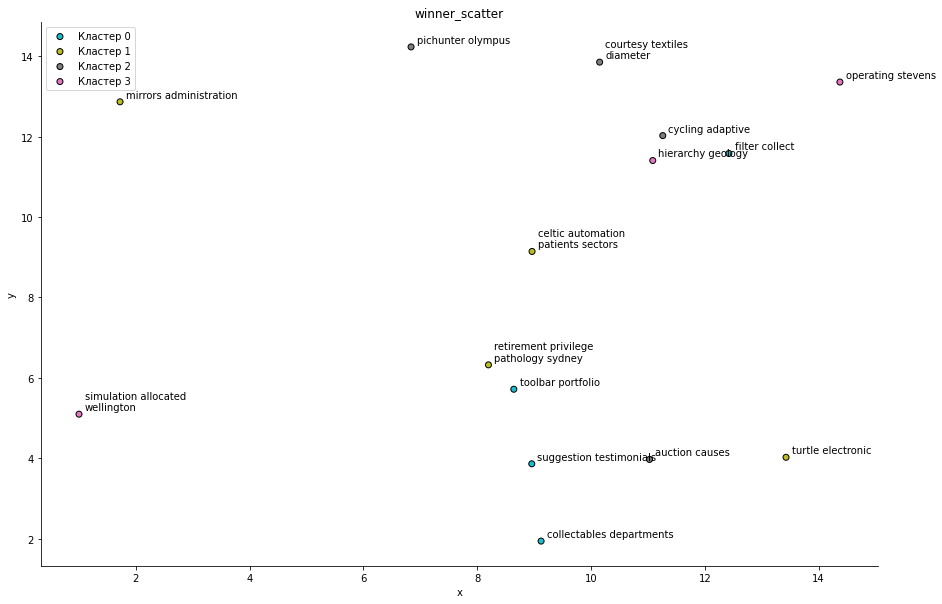

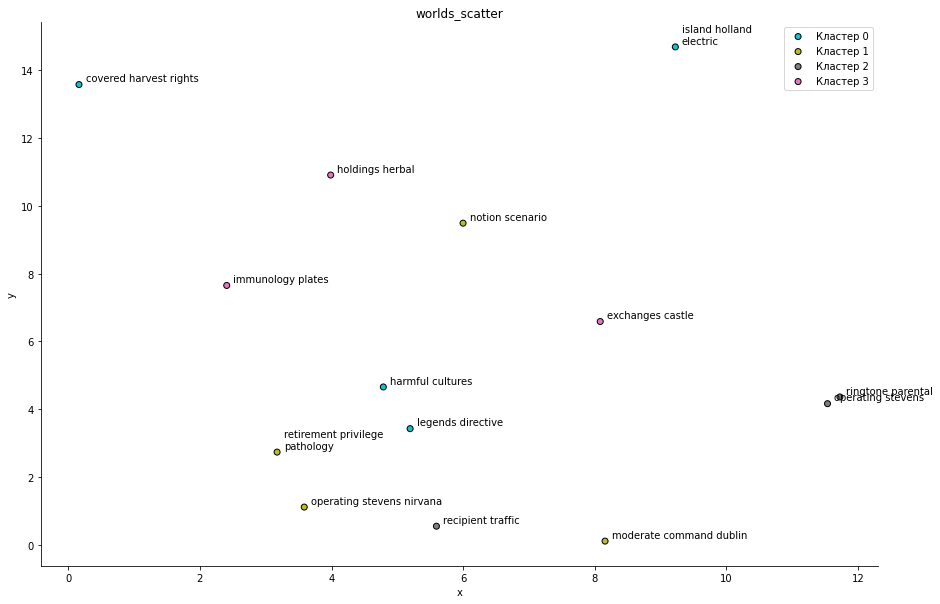

In [53]:
for area in data['area'].unique():
    data1 = data[data['area'] == area]
    fig, ax = plt.subplots(figsize=(15, 10))
    for cluster in data1['cluster_name'].unique():
        data2 = data1[data1['cluster_name'] ==  cluster]
        ax.scatter(x = data2['x'], y = data2['y'], c = data2['color'], linewidths = 1, edgecolors='black', label = cluster)
        data2.apply(lambda x: ax.annotate(x['keyword'], (x['x']+0.1, x['y']+ 0.1)), axis=1)
    ax.set_title(area+'_scatter')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.patch.set_facecolor('white')
    plt.show()
    fig.savefig((area+'_scatter.png').replace('\\', ''), dpi = 200, pad_inches=3)